In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Build deep neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)


Epoch 1/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9256 - loss: 0.2556 - val_accuracy: 0.9623 - val_loss: 0.1295
Epoch 2/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9662 - loss: 0.1103 - val_accuracy: 0.9687 - val_loss: 0.1032
Epoch 3/10
1688/1688 - 6s - 3ms/step - accuracy: 0.9774 - loss: 0.0749 - val_accuracy: 0.9740 - val_loss: 0.0851
Epoch 4/10
1688/1688 - 11s - 6ms/step - accuracy: 0.9814 - loss: 0.0577 - val_accuracy: 0.9762 - val_loss: 0.0799
Epoch 5/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9852 - loss: 0.0460 - val_accuracy: 0.9750 - val_loss: 0.0869
Epoch 6/10
1688/1688 - 7s - 4ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9757 - val_loss: 0.0879
Epoch 7/10
1688/1688 - 6s - 4ms/step - accuracy: 0.9900 - loss: 0.0298 - val_accuracy: 0.9770 - val_loss: 0.0859
Epoch 8/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9923 - loss: 0.0235 - val_accuracy: 0.9750 - val_loss: 0.0967
Epoch 9/10
1688/1688 - 10s - 6ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9783

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\n✅ Test Accuracy: {test_acc * 100:.2f}%')



✅ Test Accuracy: 97.11%


In [ ]:
import cv2
from google.colab import files
from tensorflow.keras.models import load_model


In [ ]:
def center_image(img):
    coords = cv2.findNonZero((img * 255).astype(np.uint8))
    x, y, w, h = cv2.boundingRect(coords)
    img = img[y:y+h, x:x+w]

    h, w = img.shape
    if h > w:
        pad = (h - w) // 2
        img = cv2.copyMakeBorder(img, 0, 0, pad, pad, cv2.BORDER_CONSTANT, value=0)
    else:
        pad = (w - h) // 2
        img = cv2.copyMakeBorder(img, pad, pad, 0, 0, cv2.BORDER_CONSTANT, value=0)

    img = cv2.resize(img, (28, 28))
    return img

In [ ]:
def preprocess_image(filename):
    # Read in grayscale
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Invert if background is white
    if np.mean(img) > 127:
        img = 255 - img

    # Center and resize image
    img = center_image(img)

    # Normalize
    img = img / 255.0

    # Display processed image
    plt.imshow(img, cmap='gray')
    plt.title("Processed Image")
    plt.axis('off')
    plt.show()

    return img.reshape(1, 28, 28)


Saving eight2.png to eight2 (1).png


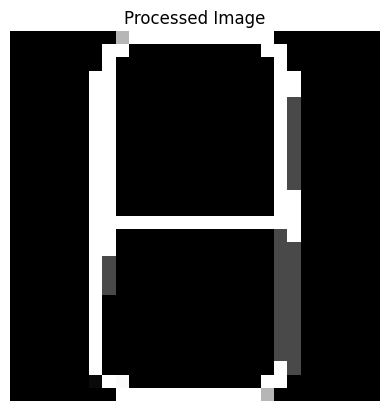

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
🔍 Predicted Digit: 9


In [ ]:
uploaded = files.upload()  # Upload a PNG or JPG image

filename = list(uploaded.keys())[0]

img_array = preprocess_image(filename)
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

print(f"🔍 Predicted Digit: {predicted_digit}")

